<a href="https://colab.research.google.com/github/IANGECHUKI176/deeplearning/blob/main/pytorch/covnets/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AlexNet Implementation from scratch
- [original paper](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)



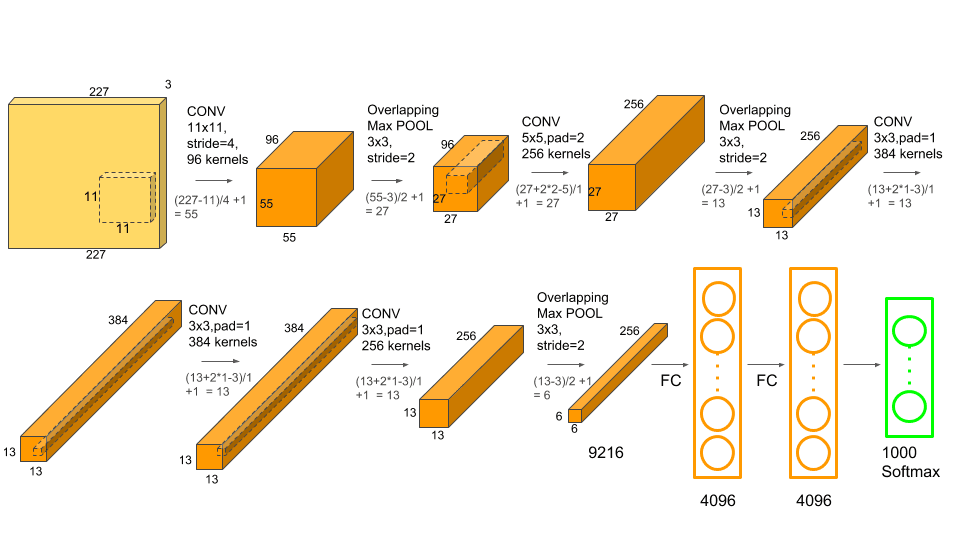

Instead of `localReponseNormalization` i use `BatchNormalization`

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
device  = "cuda" if torch.cuda.is_available() else "cpu"

# Dataloading

The input image size should be `227 * 227*3`


In [ ]:
batch_size = 64
normalize = transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],
    )
# get transforms
train_transform = transforms.Compose([
    transforms.Resize((227,227)),
    transforms.ToTensor(),
    normalize
])
test_transform = transforms.Compose([
    transforms.Resize((227,227)),
    transforms.ToTensor(),
    normalize
])

# get train dataloader
train_dataset = datasets.CIFAR10(
    root="./root",
    train = True,
    download = True,
    transform= train_transform
)
train_dataloader = torch.utils.data.DataLoader(train_dataset,shuffle = True,batch_size = batch_size)


test_dataset = datasets.CIFAR10(
    root="./root",
    train = False,
    download = True,
    transform= test_transform
)
test_dataloader = torch.utils.data.DataLoader(test_dataset,shuffle = False,batch_size = batch_size)


100%|██████████| 170498071/170498071 [00:14<00:00, 12044631.94it/s]


Extracting ./root/cifar-10-python.tar.gz to ./root
Files already downloaded and verified


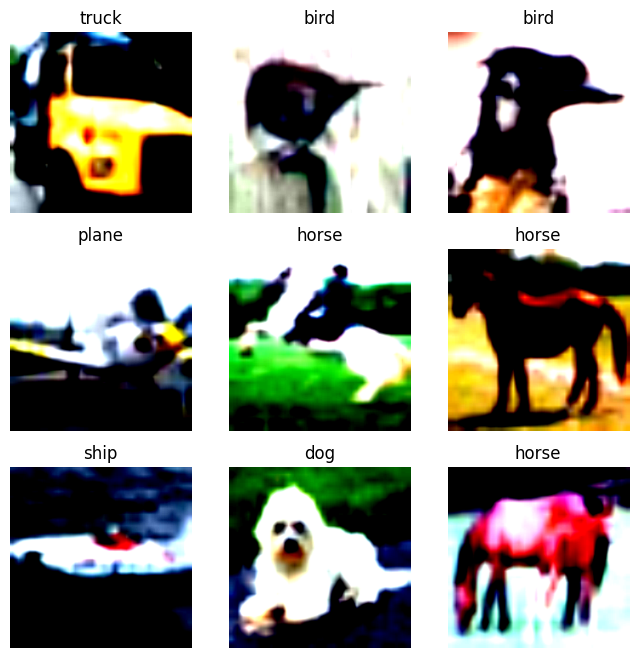

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
images,labels = next(iter(train_dataloader))
# image shape - [64,3,227,227] -> batch,channels,width,height

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# def show_image(image):
#     npimage = image.numpy()
#     return plt.imshow()
fig,axes = plt.subplots(3,3,figsize=(8,8))


for i,ax in enumerate(axes.flat):
    npimage = images[i].numpy()
    nplabel = labels[i].numpy()

    ax.imshow(np.transpose(npimage,(1,2,0)))
    ax.axis('off')
    ax.set_title(classes[nplabel])


In [ ]:
class AlexNet(nn.Module):
    def __init__(self,num_classes =10):
        super().__init__()
        #input shape -> 227 * 227 * 3
        self.layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11,stride = 4), # output -> 55*55*96
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(stride = 2,kernel_size= 3),
        )
        self.layer_2 = nn.Sequential(
            nn.Conv2d(in_channels = 96,out_channels = 256 ,kernel_size = 5,padding = 2),  # output -> 27 * 27 * 256
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(stride =2 ,kernel_size= 3)
        )
        self.layer_3 = nn.Sequential(
            nn.Conv2d(in_channels = 256,out_channels = 384 ,kernel_size = 3,padding = 1),  # output -> 13* 13* 384
            nn.BatchNorm2d(384),
            nn.ReLU()
        )
        self.layer_4 = nn.Sequential(
            nn.Conv2d(in_channels = 384,out_channels = 384,kernel_size = 3,padding = 1 ), # output -> 13* 13* 384
            nn.BatchNorm2d(384),
            nn.ReLU()
        )
        self.layer_5 = nn.Sequential(
            nn.Conv2d(in_channels= 384,out_channels= 256,kernel_size = 3,padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(stride=2,kernel_size = 3)
        )

        self.fc_1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(9216,4096),
            nn.ReLU()
        )
        self.fc_2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096,4096),
            nn.ReLU()
        )
        self.fc_3 = nn.Sequential(
            nn.Linear(4096,num_classes)
        )
    def forward(self,x):
        out = self.layer_1(x)  # 27 * 27 * 96
        out = self.layer_2(out)  #  13* 13* 256
        out = self.layer_3(out) #  13* 13* 384
        out = self.layer_4(out) # 13* 13* 384
        out = self.layer_5(out) # 6 * 6 * 256
        out = out.reshape(out.size(0),-1)
        out = self.fc_1(out)
        out = self.fc_2(out)
        out = self.fc_3(out)
        return out

In [ ]:
net = AlexNet().to(device)

In [ ]:
from torchsummary import summary

summary(net,(3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
       BatchNorm2d-2           [-1, 96, 55, 55]             192
              ReLU-3           [-1, 96, 55, 55]               0
         MaxPool2d-4           [-1, 96, 27, 27]               0
            Conv2d-5          [-1, 256, 27, 27]         614,656
       BatchNorm2d-6          [-1, 256, 27, 27]             512
              ReLU-7          [-1, 256, 27, 27]               0
         MaxPool2d-8          [-1, 256, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]         885,120
      BatchNorm2d-10          [-1, 384, 13, 13]             768
             ReLU-11          [-1, 384, 13, 13]               0
           Conv2d-12          [-1, 384, 13, 13]       1,327,488
      BatchNorm2d-13          [-1, 384, 13, 13]             768
             ReLU-14          [-1, 384,


> You can use `reshape` or `view`

Hyperparameters

In [ ]:
epochs = 10
lr=0.005
batch_size = 64

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr=lr, weight_decay = 0.005, momentum = 0.9)

In [ ]:
# import shutil

# shutil.rmtree('./root')

# Training model

In [ ]:
for epoch in range(epochs):
    for i,(images,labels) in enumerate(train_dataloader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)

        loss = criterion(outputs,labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    print(f'Epoch : {epoch +1}/{epochs} Loss :{loss:.4f}')
print('finished training')

Epoch : 1/10 Loss :0.5226
Epoch : 2/10 Loss :0.2345
Epoch : 3/10 Loss :0.5988
Epoch : 4/10 Loss :0.7504
Epoch : 5/10 Loss :0.3547
Epoch : 6/10 Loss :0.1828
Epoch : 7/10 Loss :0.5963
Epoch : 8/10 Loss :0.5911
Epoch : 9/10 Loss :0.4178
Epoch : 10/10 Loss :0.5863
finished training


Testing model

In [ ]:
total = 0
correct = 0

with torch.no_grad():
    for data in test_dataloader:
        images,labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)
        _,predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the {total} test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 81 %


In [ ]:

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


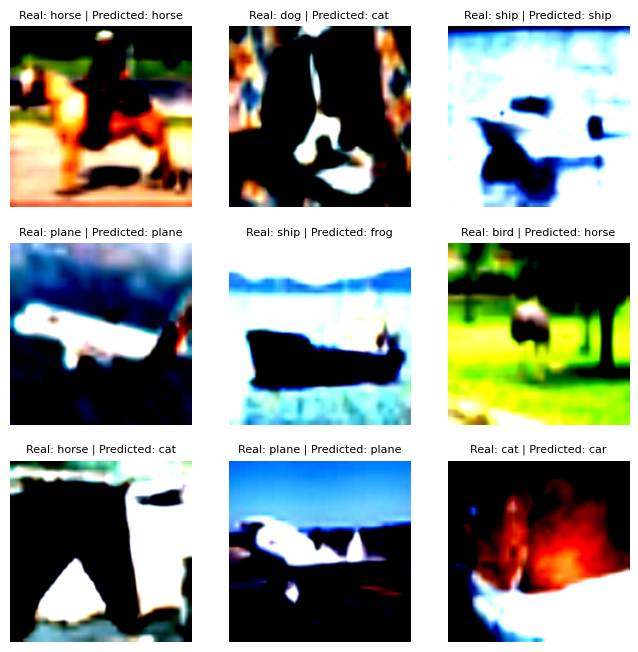

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    images = images.to(device)
    outputs = net(images[i].unsqueeze(dim=0))
    _, predicted = torch.max(outputs.data, 1)
    npimage = images[i].cpu().numpy()  # Transfer tensor to CPU before converting to NumPy
    nplabel = labels[i].cpu().numpy()  # Transfer tensor to CPU before converting to NumPy

    ax.imshow(np.transpose(npimage, (1, 2, 0)))
    ax.axis('off')
    ax.set_title(f"Real: {classes[nplabel]} | Predicted: {classes[predicted.item()]}",fontsize=8)

plt.show()
